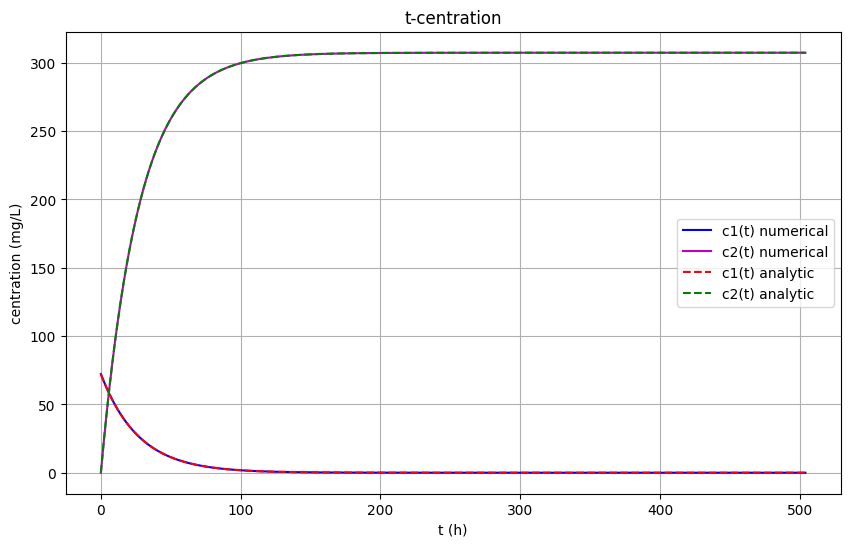

In [6]:
#This is the numerical solution for 1.d.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

V1 = 4.5       # L
V2 = 1.0       # L
k12 = 0.035    # h^-1
ke = 0.002     # h^-1
k = ke + k12   # h^-1

c1_0 = 325 / 4.5    # mg/L
c2_0 = 0            # mg/L
y0 = [c1_0, c2_0]

t = np.linspace(0, 24*21, 500)  # h

def model(y, t):
    c1, c2 = y
    dc1dt = -k * c1
    dc2dt = (k12 * V1 / V2) * c1
    return [dc1dt, dc2dt]

solution = odeint(model, y0, t)
c1 = solution[:, 0]
c2 = solution[:, 1]

c1_analytic = c1_0 * np.exp(-k * t)
c2_analytic = (11.375 / 0.037) * (1 - np.exp(-k * t))

plt.figure(figsize=(10, 6))
plt.plot(t, c1, 'b-', label='c1(t) numerical')
plt.plot(t, c2, 'm-', label='c2(t) numerical')
plt.plot(t, c1_analytic, 'r--', label='c1(t) analytic')
plt.plot(t, c2_analytic, 'g--', label='c2(t) analytic')
plt.xlabel('t (h)')
plt.ylabel('centration (mg/L)')
plt.title('t-centration')
plt.legend()
plt.grid(True)
plt.show()


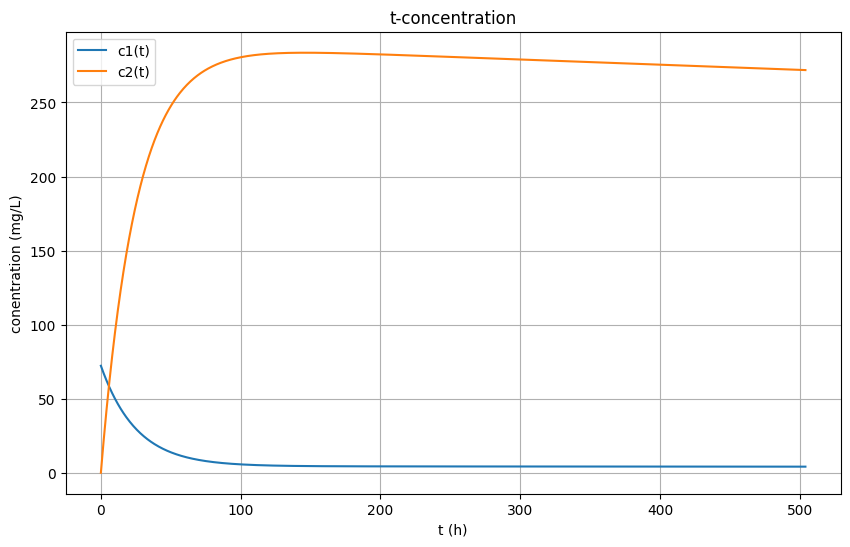

In [5]:
#This is the numerical solution for 1.c.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

V1 = 4.5       # L
V2 = 1.0       # L
k12 = 0.035    # h^-1
ke = 0.002     # h^-1
k21 = 0.0025   # h^-1

a = (k21 * V2) / V1        # h^-1
b = ke + k12               # h^-1
c = (k12 * V1) / V2        # h^-1

c1_0 = 325 / 4.5    # mg/L
c2_0 = 0            # mg/L
y0 = [c1_0, c2_0]

t = np.linspace(0, 24*21, 1000)  

def model(y, t):
    c1, c2 = y
    dc1dt = a * c2 - b * c1
    dc2dt = c * c1 - k21 * c2
    return [dc1dt, dc2dt]

solution = odeint(model, y0, t)
c1 = solution[:, 0]
c2 = solution[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t, c1, label='c1(t)')
plt.plot(t, c2, label='c2(t)')
plt.xlabel('t (h)')
plt.ylabel('conentration (mg/L)')
plt.title('t-concentration')
plt.legend()
plt.grid(True)
plt.show()


before the 3th adminstration（336h）：198.7793 mol/L
after the 3th adminstration（338h）：515.2067 mol/L


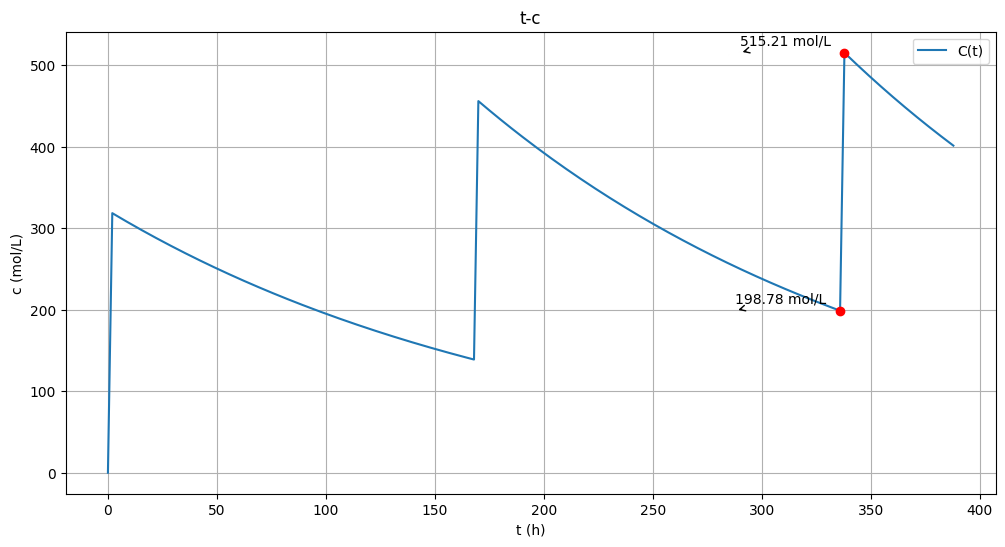

In [5]:
import numpy as np
import matplotlib.pyplot as plt

V = 5         
k = 0.005      
M0 = 800       
n = 3          

dosing_times = []
for i in range(n):
    t_start = 168 * i
    t_end = t_start + 2
    dosing_times.append(t_start)
    dosing_times.append(t_end)

t_change = sorted(dosing_times)

t_end_total = t_change[-1] + 50  
t_change = [0] + t_change + [t_end_total]

t_total = []
C_total = []

C0 = 0  

for i in range(len(t_change)-1):
    t_start = t_change[i]
    t_end = t_change[i+1]
    t_span = np.linspace(t_start, t_end, 100)  
    if i % 2 == 1:

        dosing_rate = M0
    else:

        dosing_rate = 0
    if dosing_rate == M0:
 
        C_t = (M0 / (V * k)) + (C0 - (M0 / (V * k))) * np.exp(-k * (t_span - t_start))
    else:
         C_t = C0 * np.exp(-k * (t_span - t_start))
    t_total.extend(t_span)
    C_total.extend(C_t)
    C0 = C_t[-1] 

t_total = np.array(t_total)
C_total = np.array(C_total)


index_288 = np.abs(t_total - 336).argmin()

index_290 = np.abs(t_total - 338).argmin()


concentration_288 = C_total[index_288]
concentration_290 = C_total[index_290]


print(f"before the 3th adminstration（336h）：{concentration_288:.4f} mol/L")
print(f"after the 3th adminstration（338h）：{concentration_290:.4f} mol/L")


plt.figure(figsize=(12, 6))
plt.plot(t_total, C_total, label='C(t)')
plt.scatter([336, 338], [concentration_288, concentration_290], color='red', zorder=5)
plt.annotate(f'{concentration_288:.2f} mol/L', xy=(288, concentration_288), xytext=(288, concentration_288+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'{concentration_290:.2f} mol/L', xy=(290, concentration_290), xytext=(290, concentration_290+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlabel('t (h)')
plt.ylabel('c (mol/L)')
plt.title('t-c')
plt.legend()
plt.grid(True)
plt.show()


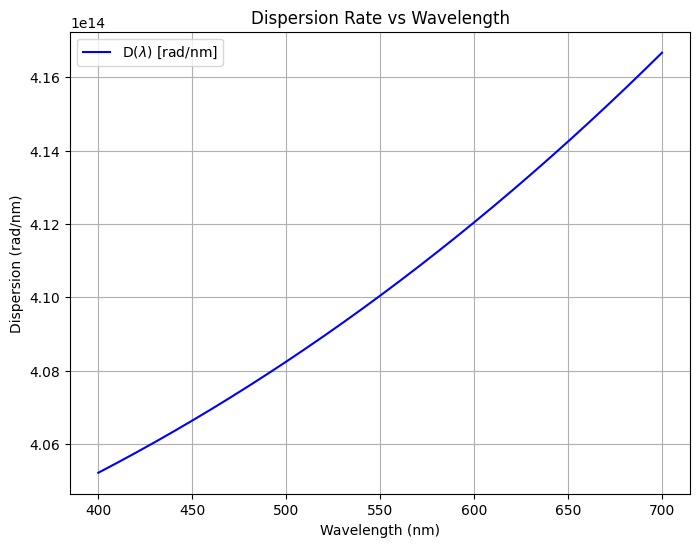

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
d = 1.25e-6  # in meters
wavelength_range = np.linspace(400e-9, 700e-9, 300)  # wavelength range from 400nm to 700nm
m = 1  # diffraction order

# Dispersion formula
D_lambda = m / (2 * d * np.sqrt(1 - (wavelength_range / (2 * d))**2))

# Convert to rad/nm for wavelength in nm
wavelength_nm = wavelength_range * 1e9  # converting wavelength to nm
D_lambda_rad_nm = D_lambda * 1e9  # converting dispersion to rad/nm

# Plotting the dispersion
plt.figure(figsize=(8, 6))
plt.plot(wavelength_nm, D_lambda_rad_nm, label=r'D($\lambda$) [rad/nm]', color='blue')
plt.title('Dispersion Rate vs Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Dispersion (rad/nm)')
plt.grid(True)
plt.legend()
plt.show()


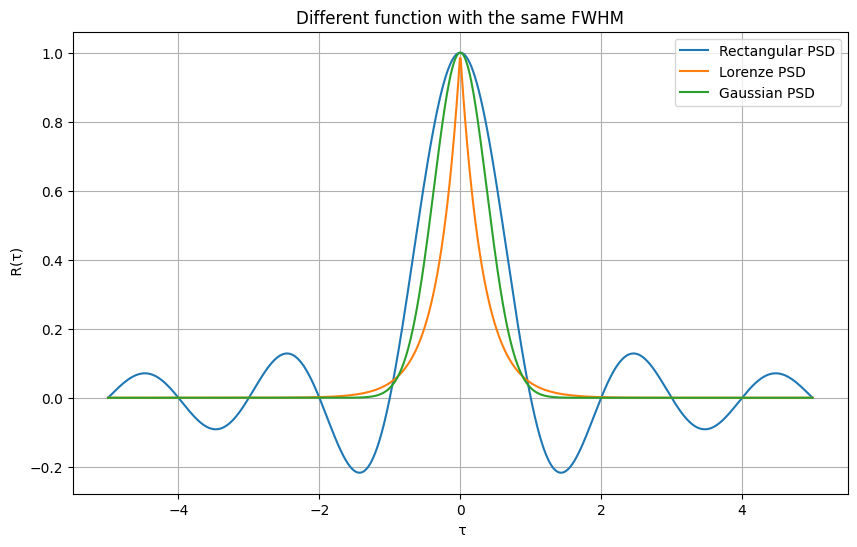

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义常量
Delta_f = 1  # 设定FWHM为1 Hz
pi = np.pi
ln2 = np.log(2)

# 定义时间延迟范围
tau = np.linspace(-5, 5, 1000)

# 计算自相关函数
R_rect = np.sinc(Delta_f * tau)  # 矩形PSD对应的sinc函数
R_lorentz = np.exp(-pi * Delta_f * np.abs(tau))  # 洛伦兹PSD对应的指数衰减
R_gauss = np.exp(- (pi * Delta_f * tau)**2 / (4 * ln2))  # 高斯PSD对应的高斯函数

# 绘制自相关函数
plt.figure(figsize=(10,6))
plt.plot(tau, R_rect, label='Rectangular PSD')
plt.plot(tau, R_lorentz, label='Lorenze PSD')
plt.plot(tau, R_gauss, label='Gaussian PSD')
plt.xlabel(' τ')
plt.ylabel(' R(τ)')
plt.title('Different function with the same FWHM')
plt.legend()
plt.grid(True)
plt.show()


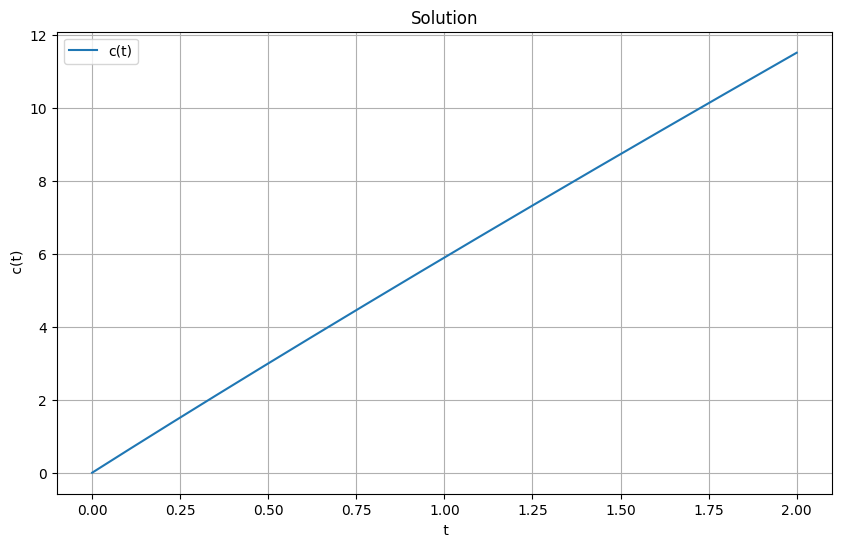

11.506349159206273


In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程
def ode(t, c):
    dc_dt = (300 - (20 * c) / (5 + c) - 1.4308 * c)/49
    return dc_dt

# 初始条件
c0 = [0]  # c(0) = 0，您可以根据需要修改初始条件

# 求解时间区间
t_span = (0, 2)  # 时间从 0 到 50，您可以根据需要调整
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 在时间区间内取 500 个点

# 求解微分方程
sol = solve_ivp(ode, t_span, c0, t_eval=t_eval)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='c(t)')
plt.xlabel(' t')
plt.ylabel(' c(t)')
plt.title('Solution')
plt.legend()
plt.grid(True)
plt.show()
print((sol.y[0][-1]))


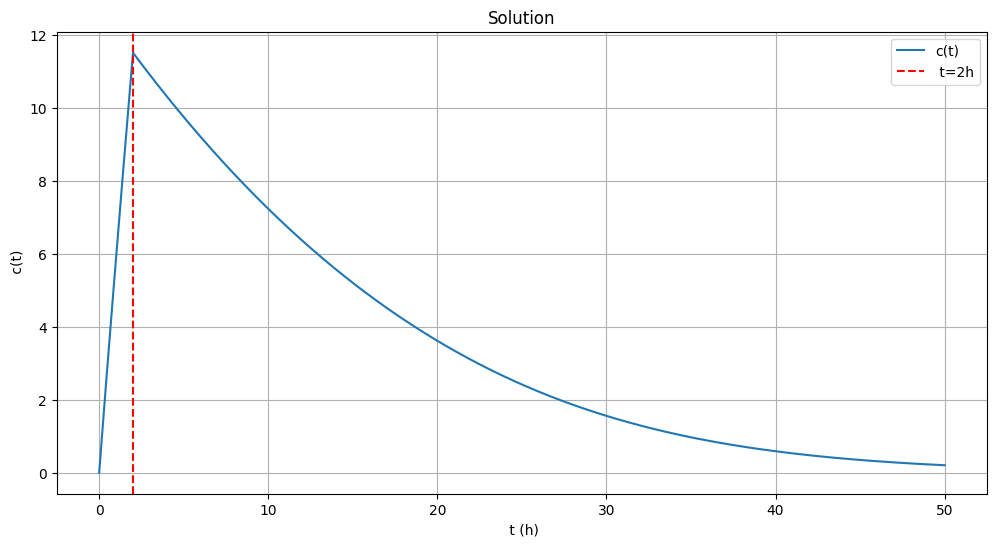

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义第一个微分方程（注射期间）
def ode_injection(t, c):
    dc_dt = (300 - (20 * c) / (5 + c) - 1.4308 * c)/49
    return dc_dt

# 定义第二个微分方程（停止注射后）
def ode_no_injection(t, c):
    dc_dt = (- (20 * c) / (5 + c) - 1.4308 * c)/49
    return dc_dt

# 初始条件
c0 = [0]  # c(0) = 0

# 时间区间设置
t1_span = (0, 2)  # 第一个时间段：0 到 2 分钟
t2_span = (2, 50)  # 第二个时间段：2 分钟到 50 分钟

# 时间点评估
t1_eval = np.linspace(t1_span[0], t1_span[1], 200)
t2_eval = np.linspace(t2_span[0], t2_span[1], 800)

# 求解第一个微分方程
sol1 = solve_ivp(ode_injection, t1_span, c0, t_eval=t1_eval)

# 在 t = 2 分钟时的浓度值
c2_initial = [sol1.y[0, -1]]

# 求解第二个微分方程
sol2 = solve_ivp(ode_no_injection, t2_span, c2_initial, t_eval=t2_eval)

# 合并时间和浓度数据
t_total = np.concatenate((sol1.t, sol2.t))
c_total = np.concatenate((sol1.y[0], sol2.y[0]))

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(t_total, c_total, label='c(t)')
plt.axvline(x=2, color='r', linestyle='--', label=' t=2h')
plt.xlabel(' t (h)')
plt.ylabel(' c(t)')
plt.title('Solution')
plt.legend()
plt.grid(True)
plt.show()


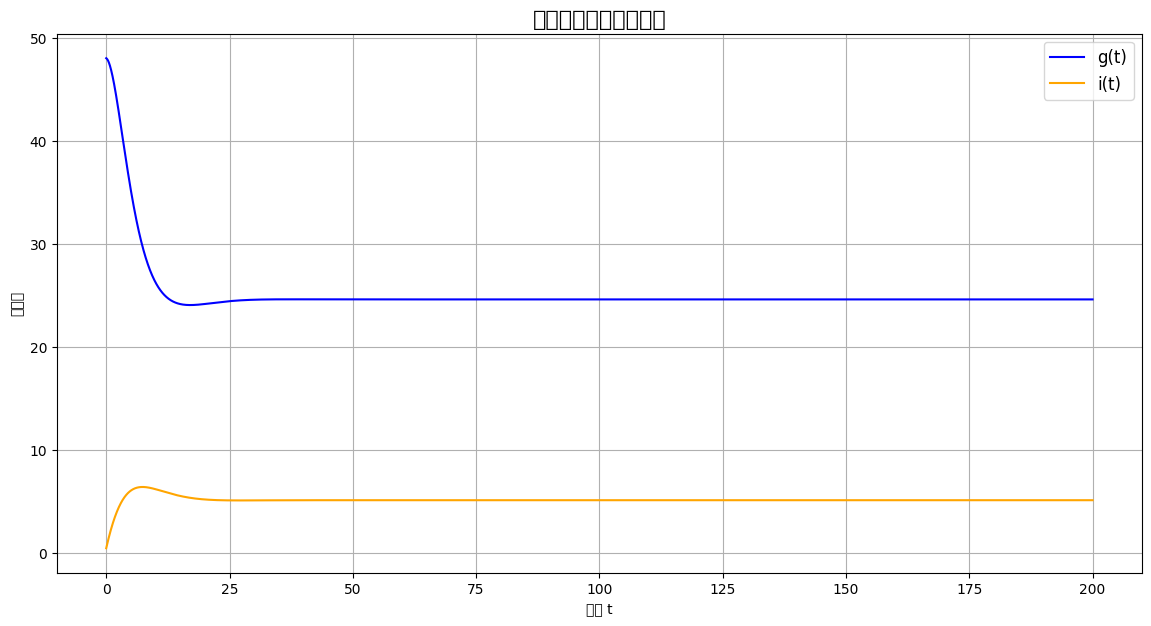

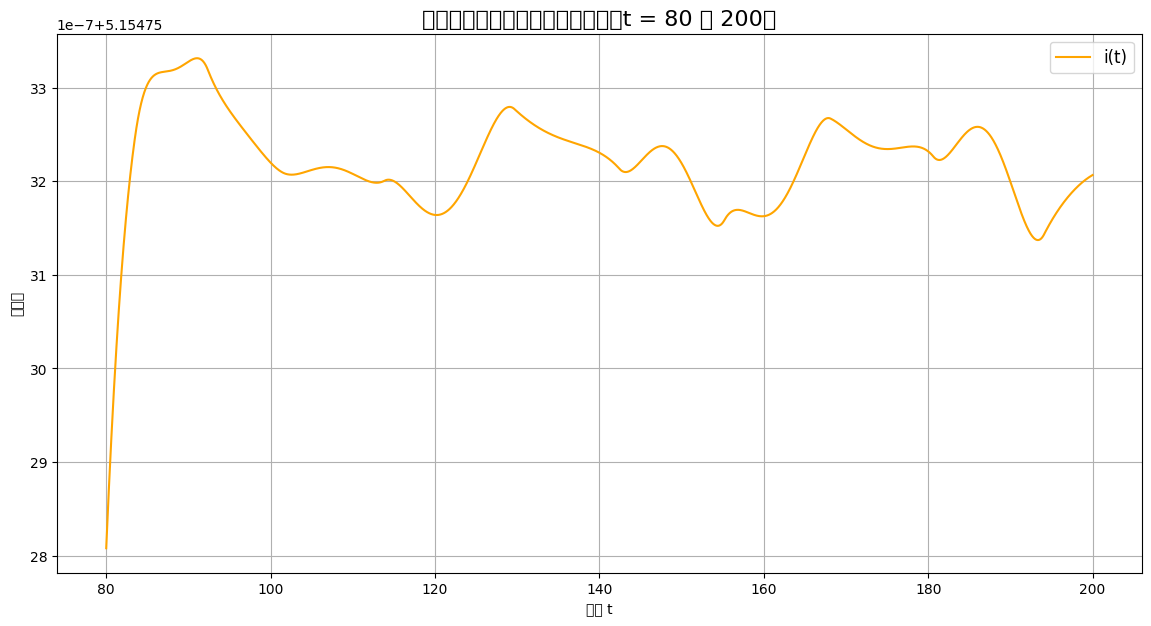

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程系统
def system(t, y):
    g, i = y
    dg_dt = 5 - g / 10 - (g * i) / 50
    di_dt = g / 20 - 0.2 - i / 5
    return [dg_dt, di_dt]

# 初始条件
g0 = 48  # 初始值 g(0)
i0 = 0.5   # 初始值 i(0)
y0 = [g0, i0]

# 时间范围和求解参数
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

solver_options = {
    'method': 'RK45',
    'rtol': 1e-8,
    'atol': 1e-10
}

# 求解微分方程
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, **solver_options)

# 提取结果
t = sol.t
g = sol.y[0]
i = sol.y[1]

# 绘制整体曲线
plt.figure(figsize=(14, 7))
plt.plot(t, g, label='g(t)', color='blue')
plt.plot(t, i, label='i(t)', color='orange')
plt.xlabel('时间 t')
plt.ylabel('变量值')
plt.title('微分方程系统的数值解', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 确定稳态时间范围
steady_start = 80
steady_end = 200

# 在稳态时间范围内增加时间点数量
t_steady = np.linspace(steady_start, steady_end, 5000)

# 在稳态时间范围内重新求解微分方程
sol_steady = solve_ivp(system, [steady_start, steady_end], [g[np.where(t >= steady_start)[0][0]], i[np.where(t >= steady_start)[0][0]]],
                       t_eval=t_steady, **solver_options)

# 提取稳态时间范围内的结果
t_zoom = sol_steady.t
g_zoom = sol_steady.y[0]
i_zoom = sol_steady.y[1]

# 绘制稳态时间范围内的细节曲线
plt.figure(figsize=(14, 7))
# plt.plot(t_zoom, g_zoom, label='g(t)', color='blue')
plt.plot(t_zoom, i_zoom, label='i(t)', color='orange')
plt.xlabel('时间 t')
plt.ylabel('变量值')
plt.title('稳态时间范围内的变量细节变化（t = {} 到 {}）'.format(steady_start, steady_end), fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



In [ ]:
print